In [1]:
# Modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Backpack_df = pd.read_csv('Data/train.csv')
Backpack_df

id         Brand Material    Size  Compartments  \
0            0      Jansport  Leather  Medium           7.0   
1            1      Jansport   Canvas   Small          10.0   
2            2  Under Armour  Leather   Small           2.0   
3            3          Nike    Nylon   Small           8.0   
4            4        Adidas   Canvas  Medium           1.0   
...        ...           ...      ...     ...           ...   
299995  299995        Adidas  Leather   Small           9.0   
299996  299996      Jansport  Leather   Large           6.0   
299997  299997          Puma   Canvas   Large           9.0   
299998  299998        Adidas    Nylon   Small           1.0   
299999  299999  Under Armour   Canvas   Small           2.0   

       Laptop Compartment Waterproof      Style  Color  Weight Capacity (kg)  \
0                     Yes         No       Tote  Black             11.611723   
1                     Yes        Yes  Messenger  Green             27.078537   
2                     Yes         No  Messenger    Red             16.643760   
3                     Yes         No  Messenger  Green             12.937220   
4                     Yes        Yes  Messenger  Green             17.749338   
...                   ...        ...        ...    ...                   ...   
299995                 No         No       Tote   Blue             12.730812   
299996                 No        Yes       Tote   Blue             26.633182   
299997                Yes        Yes   Backpack   Pink             11.898250   
299998                 No        Yes       Tote   Pink              6.175738   
299999                 No        Yes   Backpack  Black             18.568865   

            Price  
0       112.15875  
1        68.88056  
2        39.17320  
3        80.60793  
4        86.02312  
...           ...  
299995  129.99749  
299996   19.85819  
299997  111.41364  
299998  115.89080  
299999   26.72762  

[300000 rows x 11 columns]

In [3]:
Backpack_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


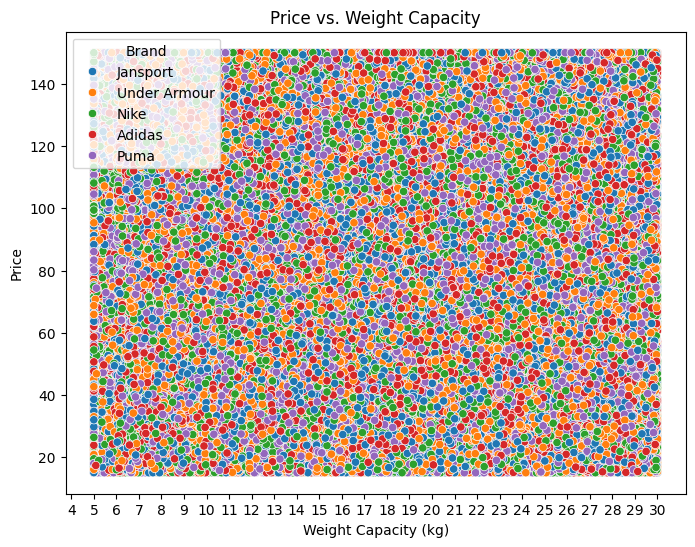

In [4]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Weight Capacity (kg)', y='Price', data=Backpack_df, hue='Brand')
plt.title('Price vs. Weight Capacity')
plt.xlabel('Weight Capacity (kg)')
plt.ylabel('Price')
plt.xticks(range(4, 31))
plt.savefig('Fig/All_Price_Weight.png')
plt.show()

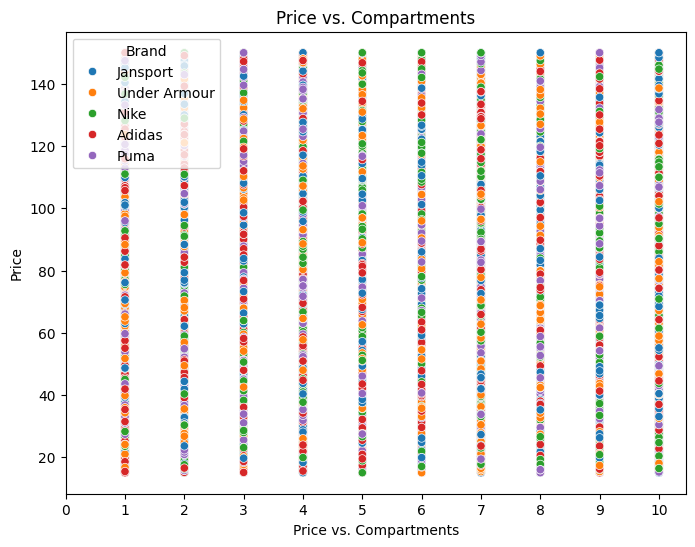

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Compartments', y='Price', data=Backpack_df, hue='Brand')
plt.title('Price vs. Compartments')
plt.xlabel('Price vs. Compartments')
plt.ylabel('Price')
plt.xticks(range(0, 11))
plt.savefig('Fig/All_Price_Compartments.png')
plt.show()

### Those backpacks don't have any relationship.
 Trying to make any multilinear regression without any relationships is only applying code. 

### Important columns in categorical values
- Brand
- Material
- Size
- Style
- Color

I will look for any relationship.

## Fill the NaN data
- New categorical
- NaN = 0.5 in data YES/NO 1/0
- Average value in 'Weight Capacity (kg)'

In [6]:
Backpack_df.columns

Index(['id', 'Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price'],
      dtype='object')

In [7]:
# new Brand NaN = small_brand
Backpack_df['Brand'] = Backpack_df['Brand'].fillna('small_brand')

In [8]:
# new Material NaN = mix_mat
Backpack_df['Material'] = Backpack_df['Material'].fillna('mix_mat')

In [9]:
# new Size NaN = non_Standar
Backpack_df['Size'] = Backpack_df['Size'].fillna('non_Standar')

In [10]:
# 'Laptop Compartment'  yes = 1 No = 0 Nan = 0.5 'Laptop Compartment'
# Backpack_df['Laptop Compartment'] = Backpack_df['Laptop Compartment'].replace(
#    to_replace={'Yes': 1, 'No': 0, 'NoData': 0.5})
Backpack_df['Laptop Compartment'] = Backpack_df['Laptop Compartment'].fillna('NoData')

In [11]:
# 'Waterproof' yes = 1 No = 0 Nan = 0.5 
# Backpack_df['Waterproof'] = Backpack_df['Waterproof'].replace(
#    to_replace={'Yes': 1, 'No': 0, 'Unknown': 0.5 })
Backpack_df['Waterproof'] = Backpack_df['Waterproof'].fillna('Unknown')

In [12]:
# new 'Style' NaN = non_Bag
Backpack_df['Style'] = Backpack_df['Style'].fillna('non_Bag')

In [13]:
# new 'Color' NaN = complex
Backpack_df['Color'] = Backpack_df['Color'].fillna('complex')

In [14]:
# 'Weight Capacity (kg)' NaN = average ()
Backpack_df['Weight Capacity (kg)'] = Backpack_df['Weight Capacity (kg)'].fillna(
    Backpack_df['Weight Capacity (kg)'].mean())

In [15]:
Backpack_df

id         Brand Material    Size  Compartments  \
0            0      Jansport  Leather  Medium           7.0   
1            1      Jansport   Canvas   Small          10.0   
2            2  Under Armour  Leather   Small           2.0   
3            3          Nike    Nylon   Small           8.0   
4            4        Adidas   Canvas  Medium           1.0   
...        ...           ...      ...     ...           ...   
299995  299995        Adidas  Leather   Small           9.0   
299996  299996      Jansport  Leather   Large           6.0   
299997  299997          Puma   Canvas   Large           9.0   
299998  299998        Adidas    Nylon   Small           1.0   
299999  299999  Under Armour   Canvas   Small           2.0   

       Laptop Compartment Waterproof      Style  Color  Weight Capacity (kg)  \
0                     Yes         No       Tote  Black             11.611723   
1                     Yes        Yes  Messenger  Green             27.078537   
2                     Yes         No  Messenger    Red             16.643760   
3                     Yes         No  Messenger  Green             12.937220   
4                     Yes        Yes  Messenger  Green             17.749338   
...                   ...        ...        ...    ...                   ...   
299995                 No         No       Tote   Blue             12.730812   
299996                 No        Yes       Tote   Blue             26.633182   
299997                Yes        Yes   Backpack   Pink             11.898250   
299998                 No        Yes       Tote   Pink              6.175738   
299999                 No        Yes   Backpack  Black             18.568865   

            Price  
0       112.15875  
1        68.88056  
2        39.17320  
3        80.60793  
4        86.02312  
...           ...  
299995  129.99749  
299996   19.85819  
299997  111.41364  
299998  115.89080  
299999   26.72762  

[300000 rows x 11 columns]

In [16]:
Backpack_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 300000 non-null  object 
 2   Material              300000 non-null  object 
 3   Size                  300000 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    300000 non-null  object 
 6   Waterproof            300000 non-null  object 
 7   Style                 300000 non-null  object 
 8   Color                 300000 non-null  object 
 9   Weight Capacity (kg)  300000 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


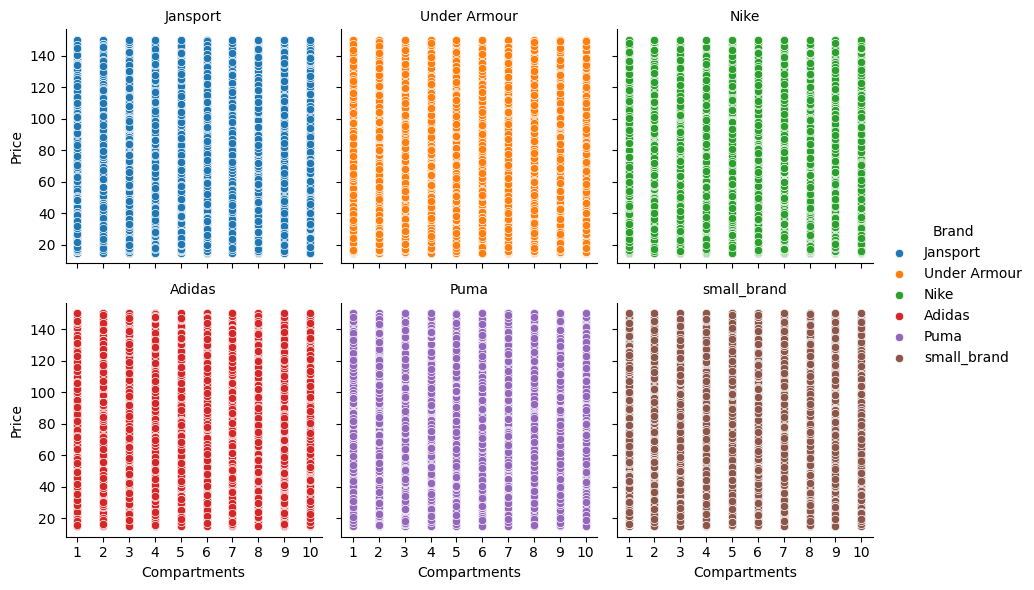

In [17]:
# FacetGrid for separate plots per Brand.
g = sns.FacetGrid(Backpack_df, col='Brand', hue='Brand', col_wrap=3) # col_wrap controls number of plots per row
g.map(sns.scatterplot, 'Compartments', 'Price')
g.add_legend()
g.set_axis_labels('Compartments', 'Price')
g.set_titles(col_template="{col_name}")
g.set(xticks=Backpack_df['Compartments'].unique())
plt.savefig('Fig/Brand_Price_Compartment.png')
plt.show()

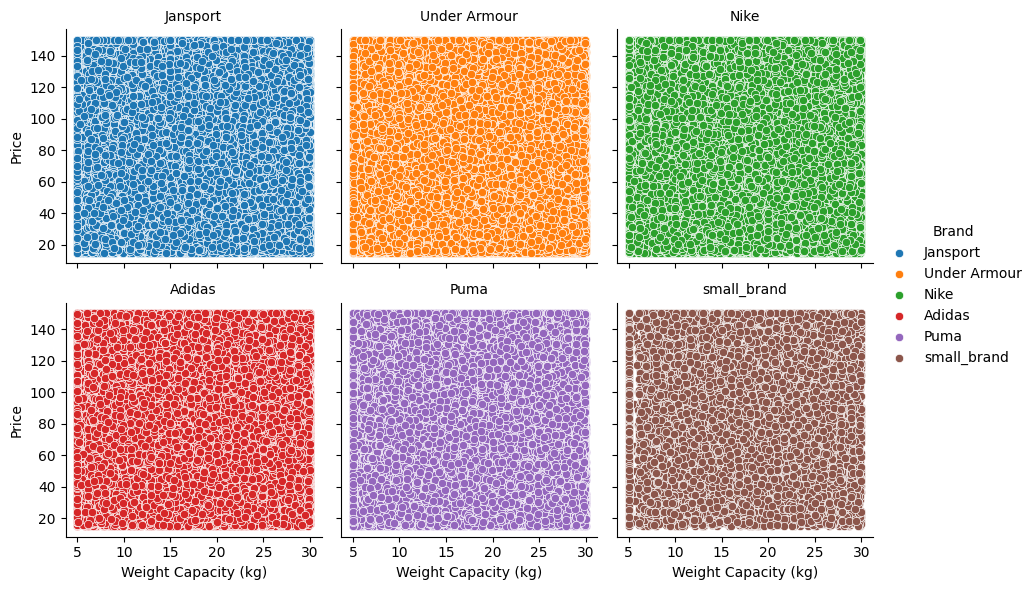

In [18]:
# FacetGrid for separate plots per Brand.
g = sns.FacetGrid(Backpack_df, col='Brand', hue='Brand', col_wrap=3) # col_wrap controls number of plots per row
g.map(sns.scatterplot, 'Weight Capacity (kg)', 'Price')
g.add_legend()
g.set_axis_labels('Weight Capacity (kg)', 'Price')
g.set_titles(col_template="{col_name}")
# g.set(xticks=Backpack_df['Compartments'].unique())
plt.savefig('Fig/Brand_Price_Weight.png')
plt.show()

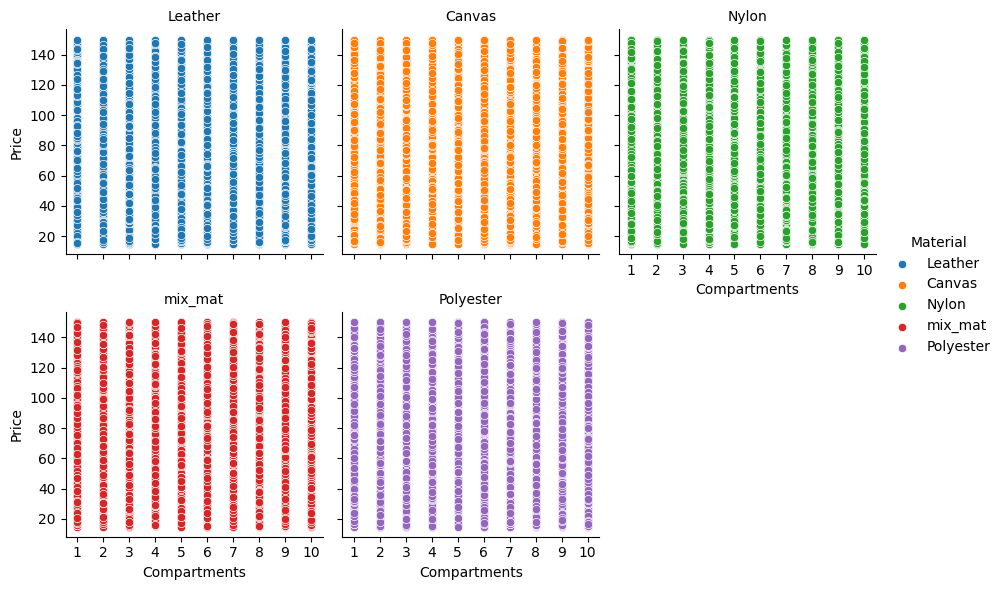

In [19]:
# FacetGrid for separate plots per Material.
g = sns.FacetGrid(Backpack_df, col='Material', hue='Material', col_wrap=3) # col_wrap controls number of plots per row
g.map(sns.scatterplot, 'Compartments', 'Price')
g.add_legend()
g.set_axis_labels('Compartments', 'Price')
g.set_titles(col_template="{col_name}")
g.set(xticks=Backpack_df['Compartments'].unique())
plt.savefig('Fig/Material_Price_Compartment.png')
plt.show()

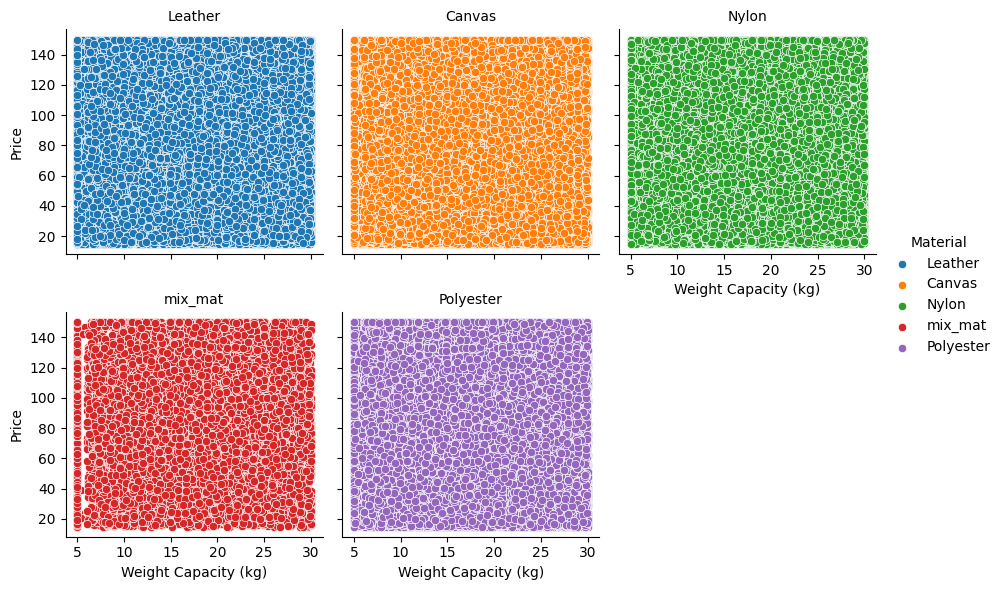

In [20]:
# FacetGrid for separate plots per Material.
g = sns.FacetGrid(Backpack_df, col='Material', hue='Material', col_wrap=3) # col_wrap controls number of plots per row
g.map(sns.scatterplot, 'Weight Capacity (kg)', 'Price')
g.add_legend()
g.set_axis_labels('Weight Capacity (kg)', 'Price')
g.set_titles(col_template="{col_name}")
# g.set(xticks=Backpack_df['Compartments'].unique())
plt.savefig('Fig/Material_Price_Weight.png')
plt.show()

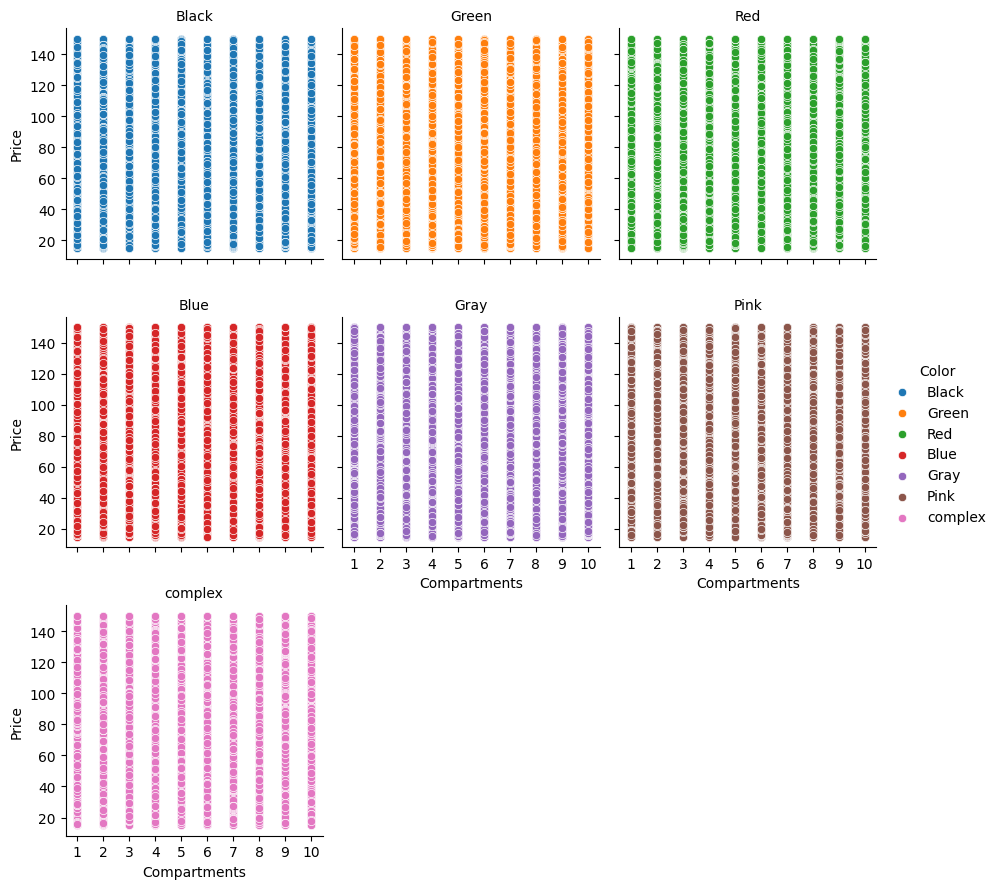

In [21]:
# FacetGrid for separate plots per Color.
g = sns.FacetGrid(Backpack_df, col='Color', hue='Color', col_wrap=3) # col_wrap controls number of plots per row
g.map(sns.scatterplot, 'Compartments', 'Price')
g.add_legend()
g.set_axis_labels('Compartments', 'Price')
g.set_titles(col_template="{col_name}")
g.set(xticks=Backpack_df['Compartments'].unique())
plt.savefig('Fig/Color_Price_Compartment.png')
plt.show()

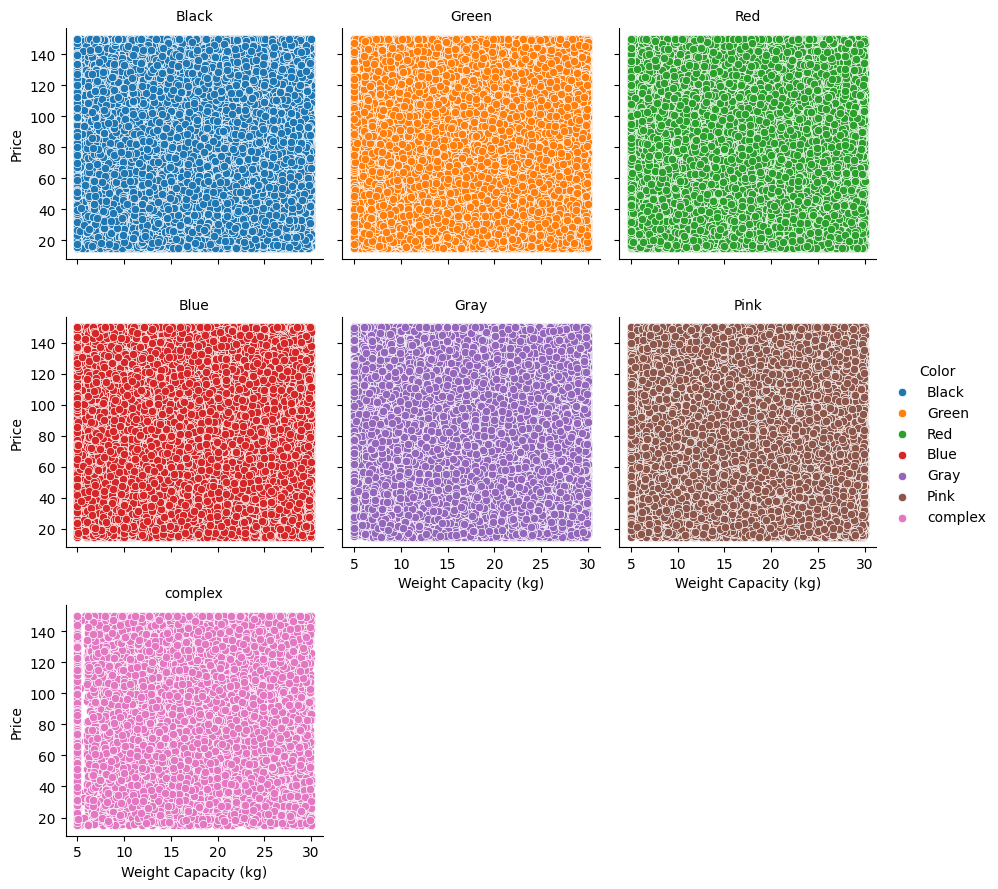

In [22]:
# FacetGrid for separate plots per Color.
g = sns.FacetGrid(Backpack_df, col='Color', hue='Color', col_wrap=3) # col_wrap controls number of plots per row
g.map(sns.scatterplot, 'Weight Capacity (kg)', 'Price')
g.add_legend()
g.set_axis_labels('Weight Capacity (kg)', 'Price')
g.set_titles(col_template="{col_name}")
# g.set(xticks=Backpack_df['Compartments'].unique())
plt.savefig('Fig/Color_Price_Weight.png')
plt.show()

### Isolate a Brand

In [23]:
Backpack_df['Brand'].unique()

array(['Jansport', 'Under Armour', 'Nike', 'Adidas', 'Puma',
       'small_brand'], dtype=object)

In [24]:
Backpack_df_Jansport = Backpack_df[Backpack_df['Brand']== 'Jansport']

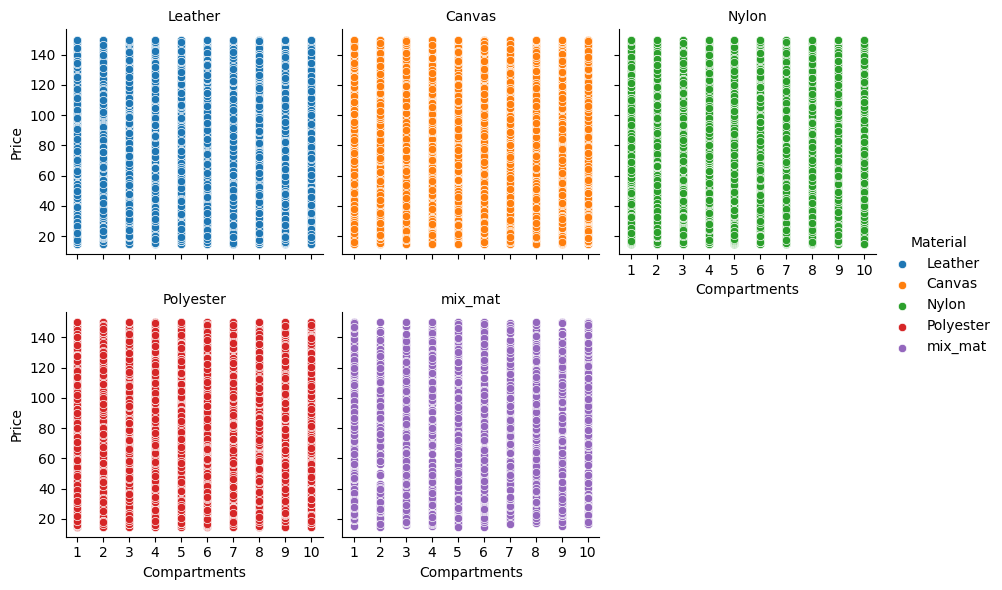

In [30]:
# FacetGrid for separate plots per Material.
g = sns.FacetGrid(Backpack_df_Jansport, col='Material', hue='Material', col_wrap=3) # col_wrap controls number of plots per row
g.map(sns.scatterplot, 'Compartments', 'Price')
g.add_legend()
g.set_axis_labels('Compartments', 'Price')
g.set_titles(col_template="{col_name}")
g.set(xticks=Backpack_df['Compartments'].unique())
plt.savefig('Fig/Jansport_Material_Price_Compartment.png')
plt.show()

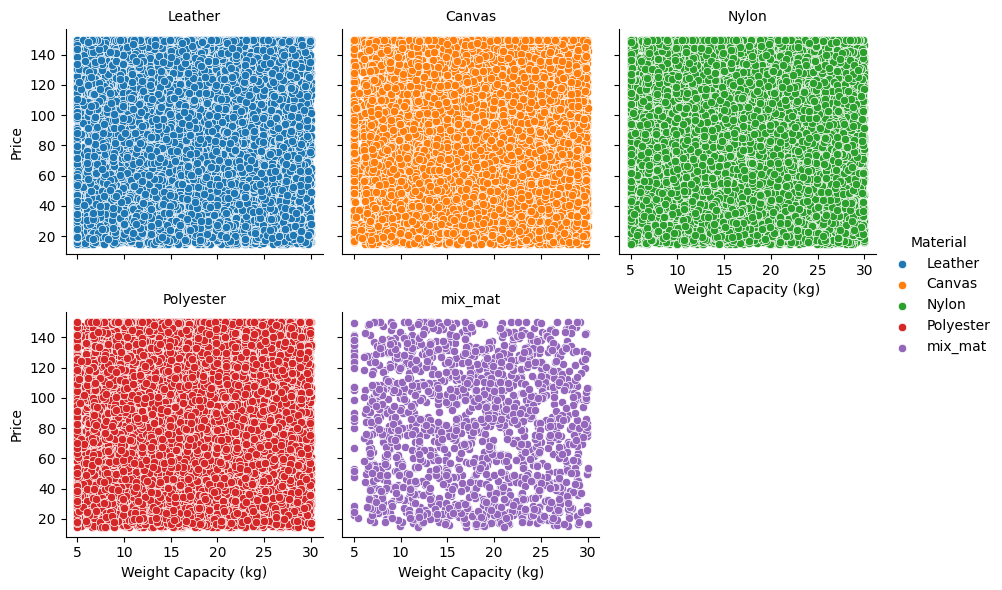

In [31]:
# FacetGrid for separate plots per Material.
g = sns.FacetGrid(Backpack_df_Jansport, col='Material', hue='Material', col_wrap=3) # col_wrap controls number of plots per row
g.map(sns.scatterplot, 'Weight Capacity (kg)', 'Price')
g.add_legend()
g.set_axis_labels('Weight Capacity (kg)', 'Price')
g.set_titles(col_template="{col_name}")
# g.set(xticks=Backpack_df['Compartments'].unique())
plt.savefig('Fig/Jansport_Material_Price_Weight.png')
plt.show()

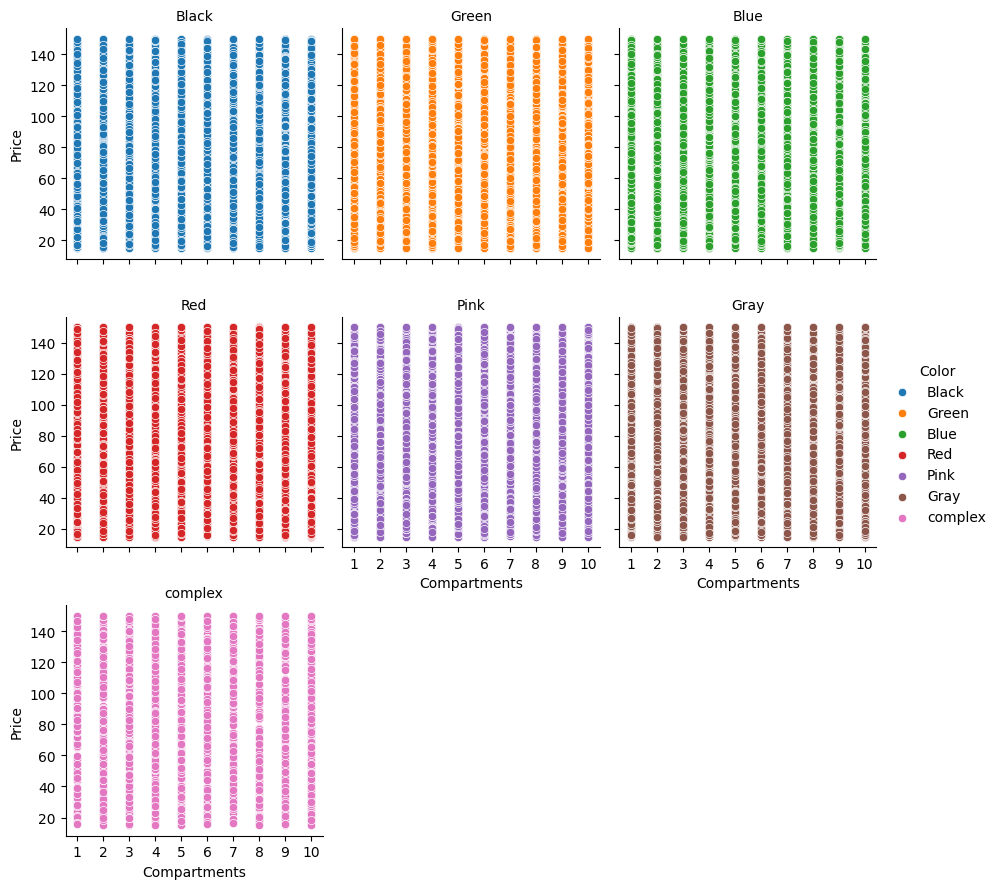

In [32]:
# FacetGrid for separate plots per Color.
g = sns.FacetGrid(Backpack_df_Jansport, col='Color', hue='Color', col_wrap=3) # col_wrap controls number of plots per row
g.map(sns.scatterplot, 'Compartments', 'Price')
g.add_legend()
g.set_axis_labels('Compartments', 'Price')
g.set_titles(col_template="{col_name}")
g.set(xticks=Backpack_df['Compartments'].unique())
plt.savefig('Fig/Jansport_Color_Price_Compartment.png')
plt.show()

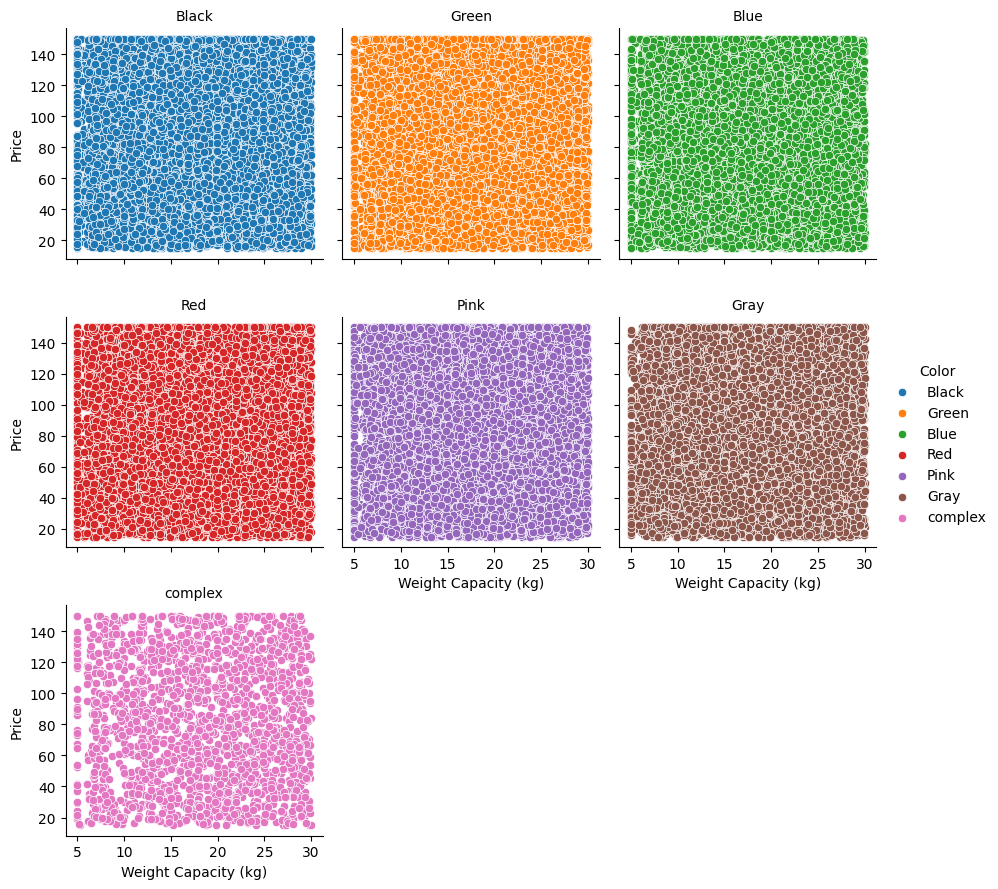

In [33]:
# FacetGrid for separate plots per Color.
g = sns.FacetGrid(Backpack_df_Jansport, col='Color', hue='Color', col_wrap=3) # col_wrap controls number of plots per row
g.map(sns.scatterplot, 'Weight Capacity (kg)', 'Price')
g.add_legend()
g.set_axis_labels('Weight Capacity (kg)', 'Price')
g.set_titles(col_template="{col_name}")
# g.set(xticks=Backpack_df['Compartments'].unique())
plt.savefig('Fig/Jansport_Color_Price_Weight.png')
plt.show()

In [29]:
Backpack_df_Adidas = Backpack_df[Backpack_df['Brand']== 'Adidas']

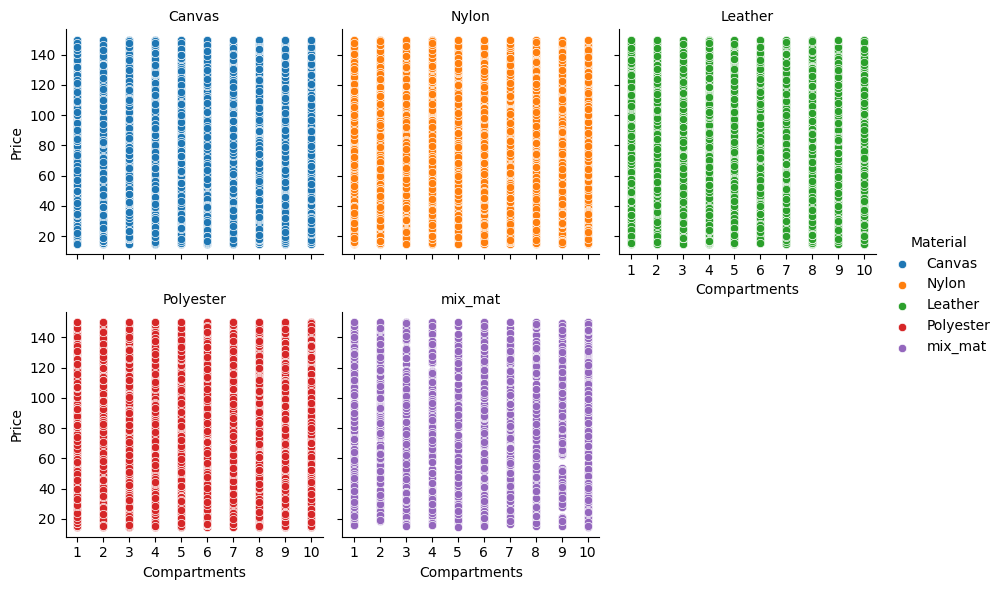

In [34]:
# FacetGrid for separate plots per Material.
g = sns.FacetGrid(Backpack_df_Adidas, col='Material', hue='Material', col_wrap=3) # col_wrap controls number of plots per row
g.map(sns.scatterplot, 'Compartments', 'Price')
g.add_legend()
g.set_axis_labels('Compartments', 'Price')
g.set_titles(col_template="{col_name}")
g.set(xticks=Backpack_df['Compartments'].unique())
plt.savefig('Fig/Adidas_Material_Price_Compartment.png')
plt.show()

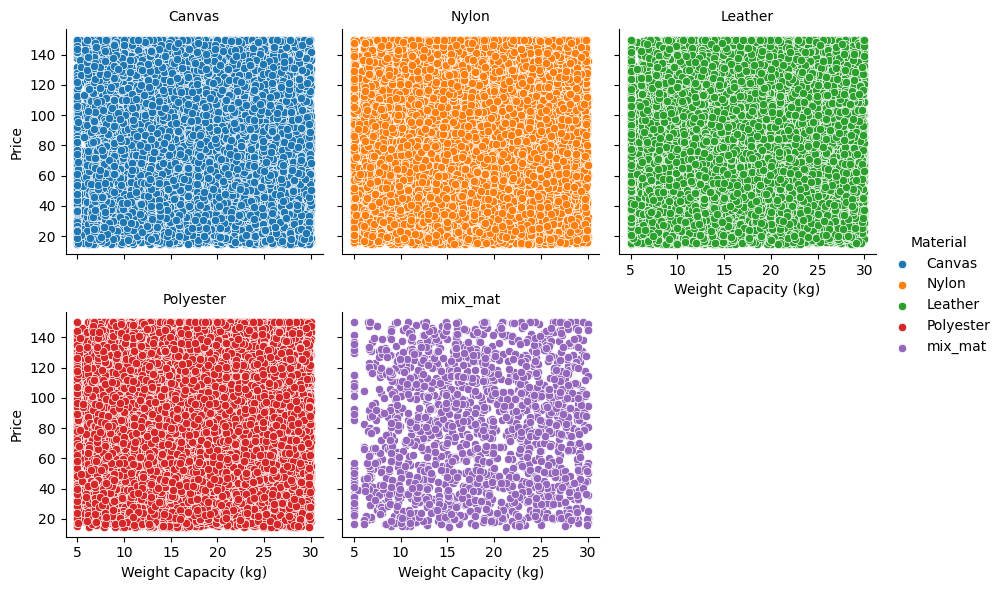

In [35]:
# FacetGrid for separate plots per Material.
g = sns.FacetGrid(Backpack_df_Adidas, col='Material', hue='Material', col_wrap=3) # col_wrap controls number of plots per row
g.map(sns.scatterplot, 'Weight Capacity (kg)', 'Price')
g.add_legend()
g.set_axis_labels('Weight Capacity (kg)', 'Price')
g.set_titles(col_template="{col_name}")
# g.set(xticks=Backpack_df['Compartments'].unique())
plt.savefig('Fig/Adidas_Material_Price_Weight.png')
plt.show()

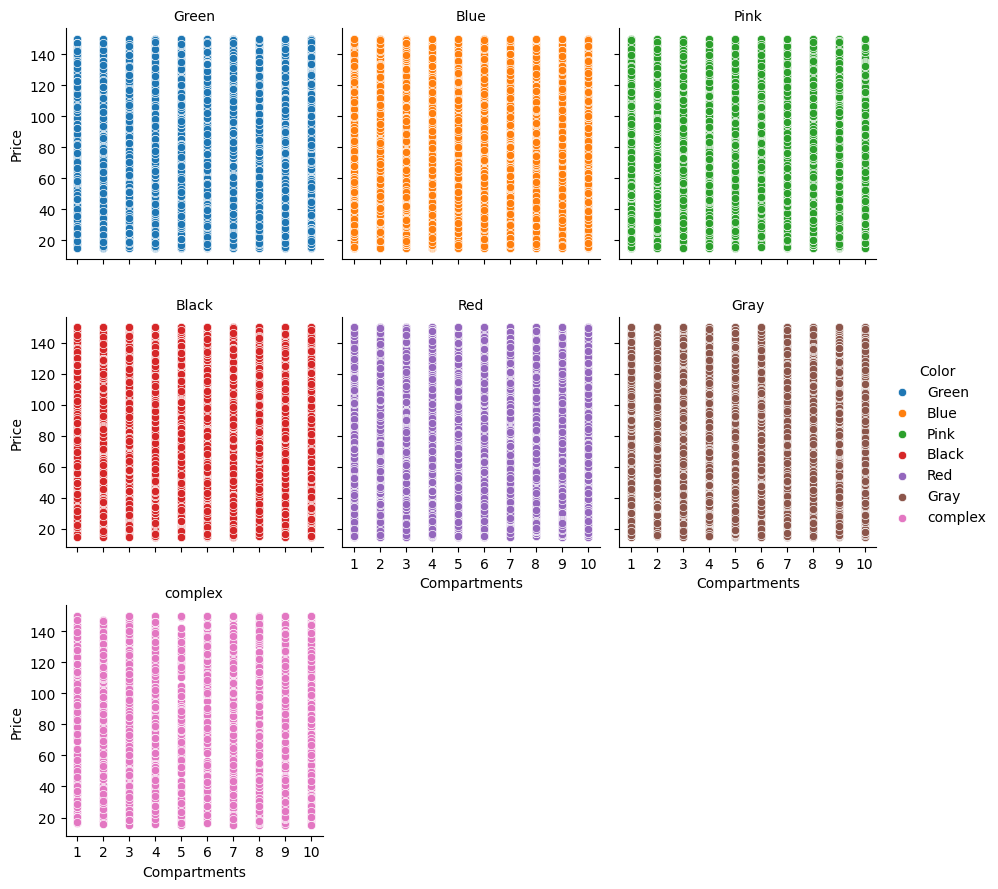

In [36]:
# FacetGrid for separate plots per Color.
g = sns.FacetGrid(Backpack_df_Adidas, col='Color', hue='Color', col_wrap=3) # col_wrap controls number of plots per row
g.map(sns.scatterplot, 'Compartments', 'Price')
g.add_legend()
g.set_axis_labels('Compartments', 'Price')
g.set_titles(col_template="{col_name}")
g.set(xticks=Backpack_df['Compartments'].unique())
plt.savefig('Fig/Adidas_Color_Price_Compartment.png')
plt.show()

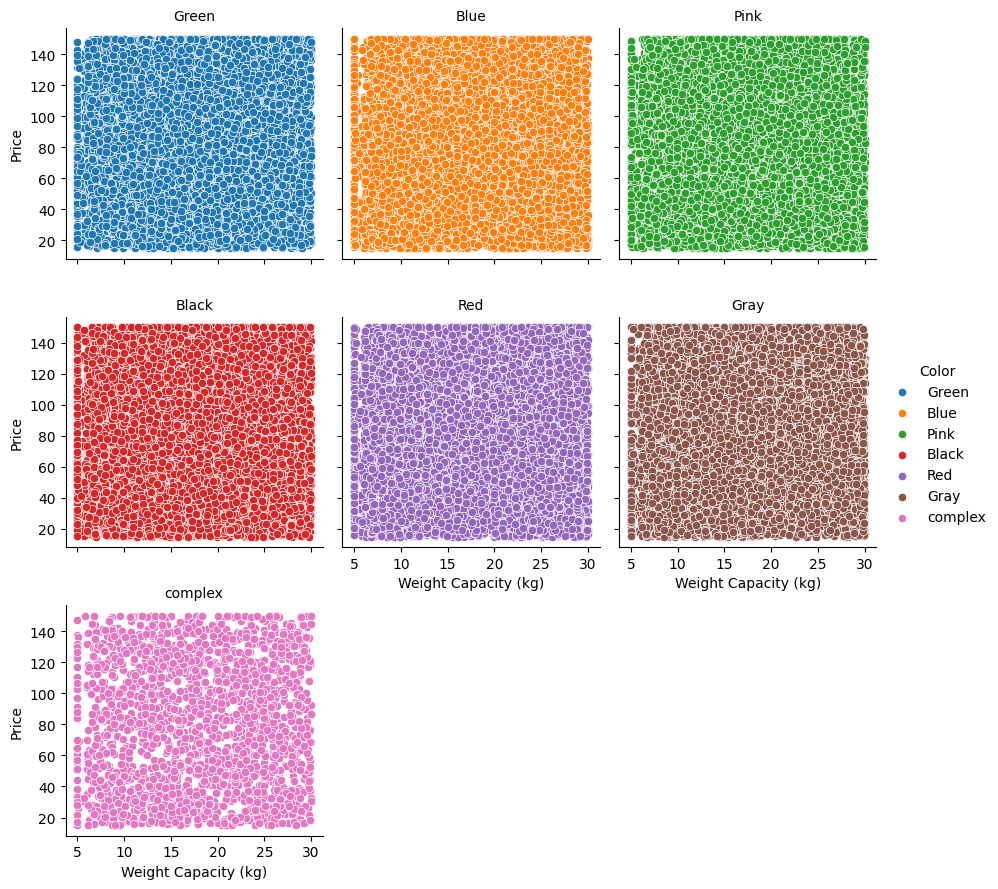

In [37]:
# FacetGrid for separate plots per Color.
g = sns.FacetGrid(Backpack_df_Adidas, col='Color', hue='Color', col_wrap=3) # col_wrap controls number of plots per row
g.map(sns.scatterplot, 'Weight Capacity (kg)', 'Price')
g.add_legend()
g.set_axis_labels('Weight Capacity (kg)', 'Price')
g.set_titles(col_template="{col_name}")
# g.set(xticks=Backpack_df['Compartments'].unique())
plt.savefig('Fig/JAdidas_Color_Price_Weight.png')
plt.show()

### Isolate Material

In [38]:
Backpack_df['Material'].unique()

array(['Leather', 'Canvas', 'Nylon', 'mix_mat', 'Polyester'], dtype=object)

In [39]:
Backpack_df_Leather = Backpack_df[Backpack_df['Material']== 'Leather']

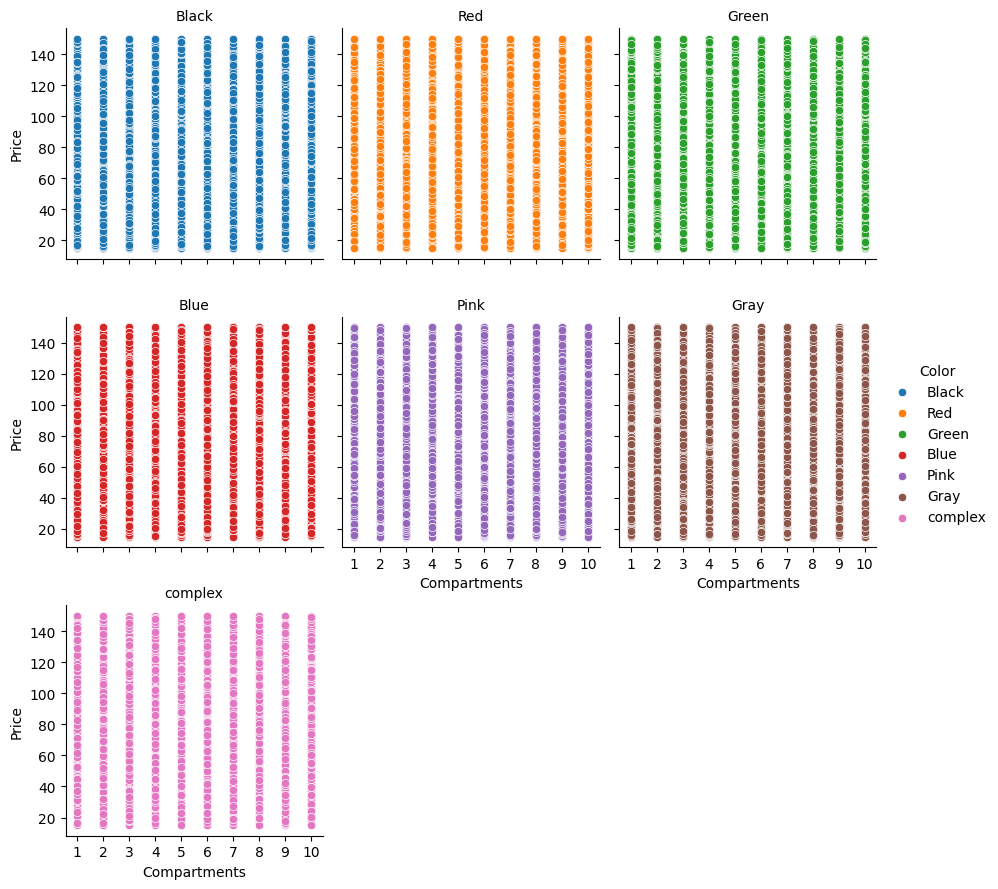

In [40]:
# FacetGrid for separate plots per Color.
g = sns.FacetGrid(Backpack_df_Leather, col='Color', hue='Color', col_wrap=3) # col_wrap controls number of plots per row
g.map(sns.scatterplot, 'Compartments', 'Price')
g.add_legend()
g.set_axis_labels('Compartments', 'Price')
g.set_titles(col_template="{col_name}")
g.set(xticks=Backpack_df['Compartments'].unique())
plt.savefig('Fig/Leather_Color_Price_Compartment.png')
plt.show()

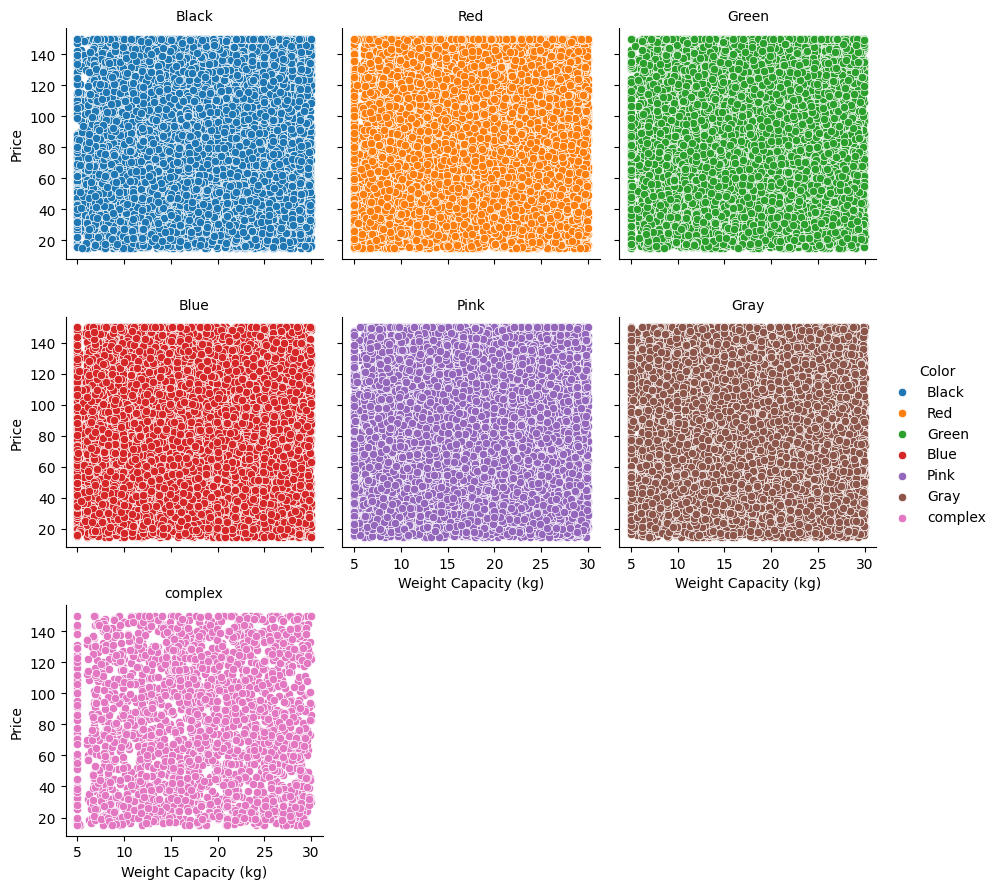

In [41]:
# FacetGrid for separate plots per Color.
g = sns.FacetGrid(Backpack_df_Leather, col='Color', hue='Color', col_wrap=3) # col_wrap controls number of plots per row
g.map(sns.scatterplot, 'Weight Capacity (kg)', 'Price')
g.add_legend()
g.set_axis_labels('Weight Capacity (kg)', 'Price')
g.set_titles(col_template="{col_name}")
# g.set(xticks=Backpack_df['Compartments'].unique())
plt.savefig('Fig/Leather_Color_Price_Weight.png')
plt.show()

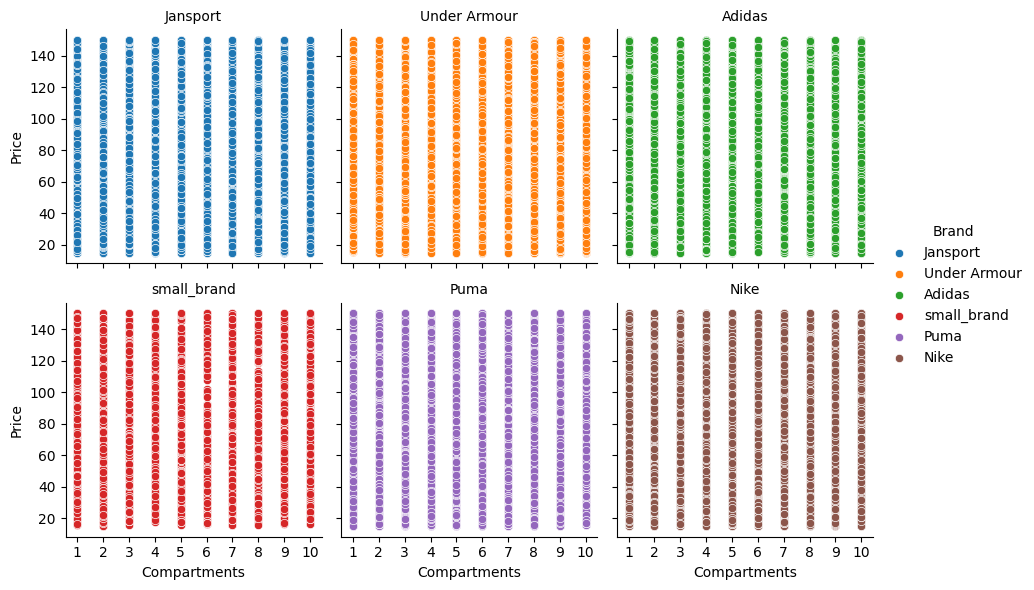

In [42]:
# FacetGrid for separate plots per Brand.
g = sns.FacetGrid(Backpack_df_Leather, col='Brand', hue='Brand', col_wrap=3) # col_wrap controls number of plots per row
g.map(sns.scatterplot, 'Compartments', 'Price')
g.add_legend()
g.set_axis_labels('Compartments', 'Price')
g.set_titles(col_template="{col_name}")
g.set(xticks=Backpack_df['Compartments'].unique())
plt.savefig('Fig/Leather_Brand_Price_Compartment.png')
plt.show()

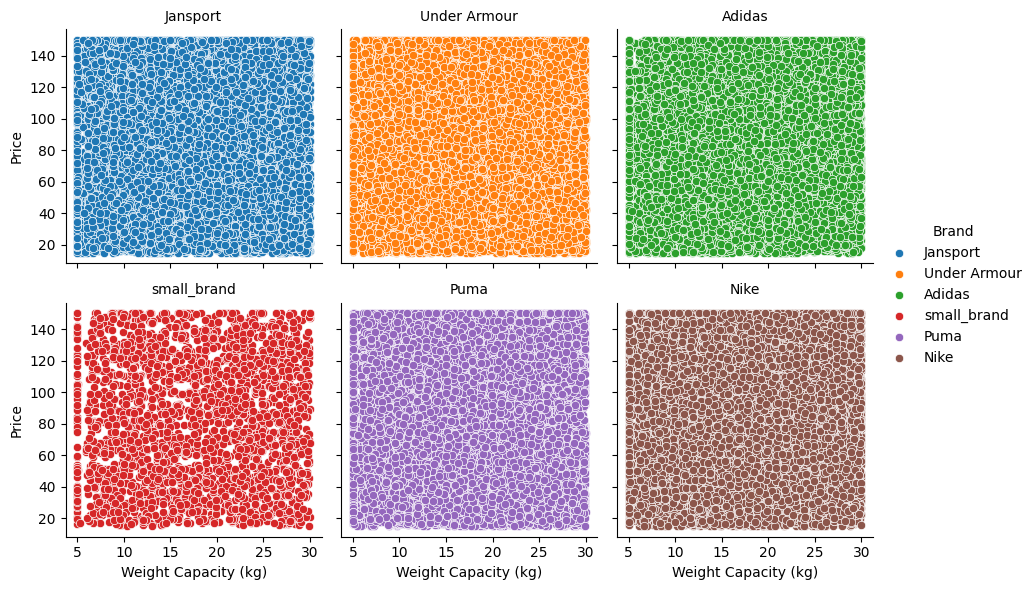

In [43]:
# FacetGrid for separate plots per Brand.
g = sns.FacetGrid(Backpack_df_Leather, col='Brand', hue='Brand', col_wrap=3) # col_wrap controls number of plots per row
g.map(sns.scatterplot, 'Weight Capacity (kg)', 'Price')
g.add_legend()
g.set_axis_labels('Weight Capacity (kg)', 'Price')
g.set_titles(col_template="{col_name}")
# g.set(xticks=Backpack_df['Compartments'].unique())
plt.savefig('Fig/Leather_Brand_Price_Weight.png')
plt.show()

### Isolate color

In [44]:
Backpack_df['Color'].unique()

array(['Black', 'Green', 'Red', 'Blue', 'Gray', 'Pink', 'complex'],
      dtype=object)

In [45]:
Backpack_df_Blue = Backpack_df[Backpack_df['Color']== 'Blue']

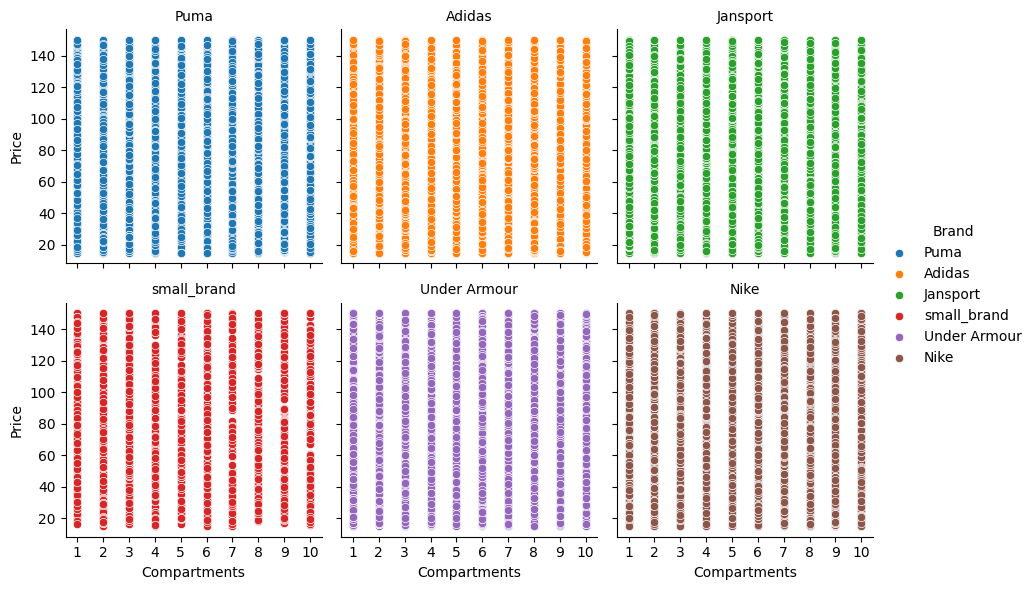

In [46]:
# FacetGrid for separate plots per Brand.
g = sns.FacetGrid(Backpack_df_Blue, col='Brand', hue='Brand', col_wrap=3) # col_wrap controls number of plots per row
g.map(sns.scatterplot, 'Compartments', 'Price')
g.add_legend()
g.set_axis_labels('Compartments', 'Price')
g.set_titles(col_template="{col_name}")
g.set(xticks=Backpack_df['Compartments'].unique())
plt.savefig('Fig/Blue_Brand_Price_Compartment.png')
plt.show()

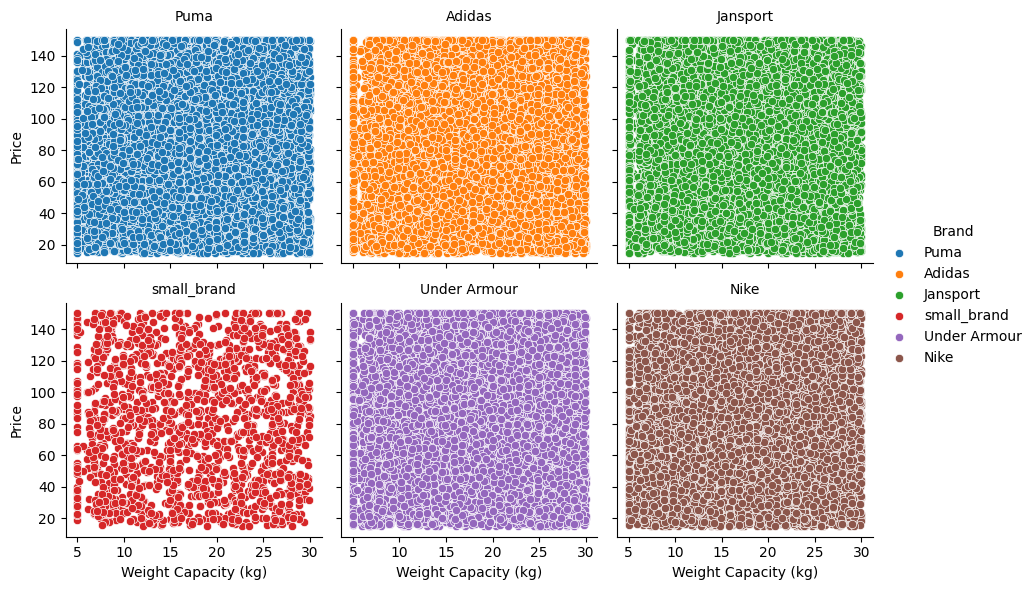

In [47]:
# FacetGrid for separate plots per Brand.
g = sns.FacetGrid(Backpack_df_Blue, col='Brand', hue='Brand', col_wrap=3) # col_wrap controls number of plots per row
g.map(sns.scatterplot, 'Weight Capacity (kg)', 'Price')
g.add_legend()
g.set_axis_labels('Weight Capacity (kg)', 'Price')
g.set_titles(col_template="{col_name}")
# g.set(xticks=Backpack_df['Compartments'].unique())
plt.savefig('Fig/Blue_Brand_Price_Weight.png')
plt.show()

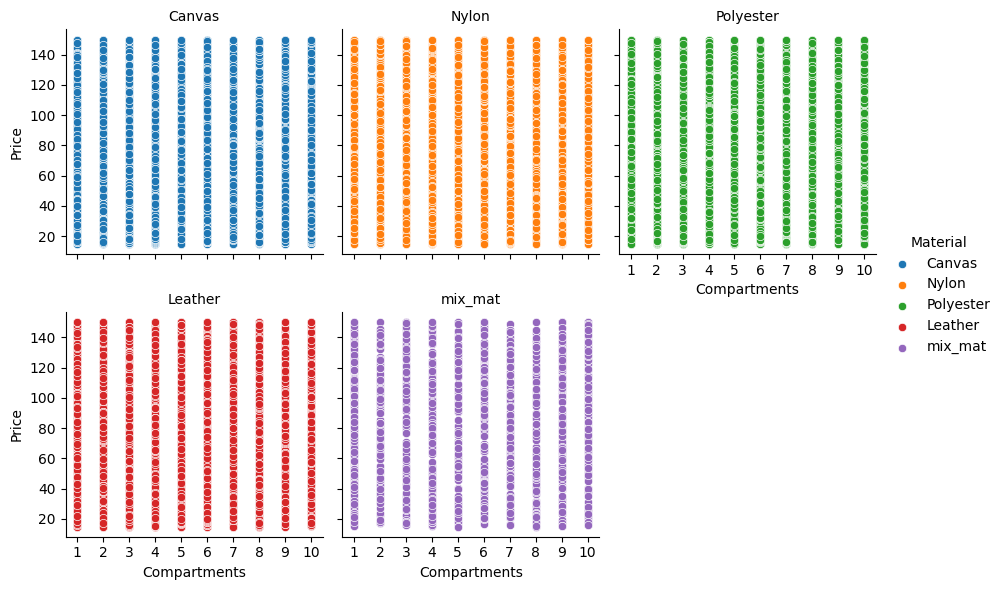

In [48]:
# FacetGrid for separate plots per Material.
g = sns.FacetGrid(Backpack_df_Blue, col='Material', hue='Material', col_wrap=3) # col_wrap controls number of plots per row
g.map(sns.scatterplot, 'Compartments', 'Price')
g.add_legend()
g.set_axis_labels('Compartments', 'Price')
g.set_titles(col_template="{col_name}")
g.set(xticks=Backpack_df['Compartments'].unique())
plt.savefig('Fig/Blue_Material_Price_Compartment.png')
plt.show()

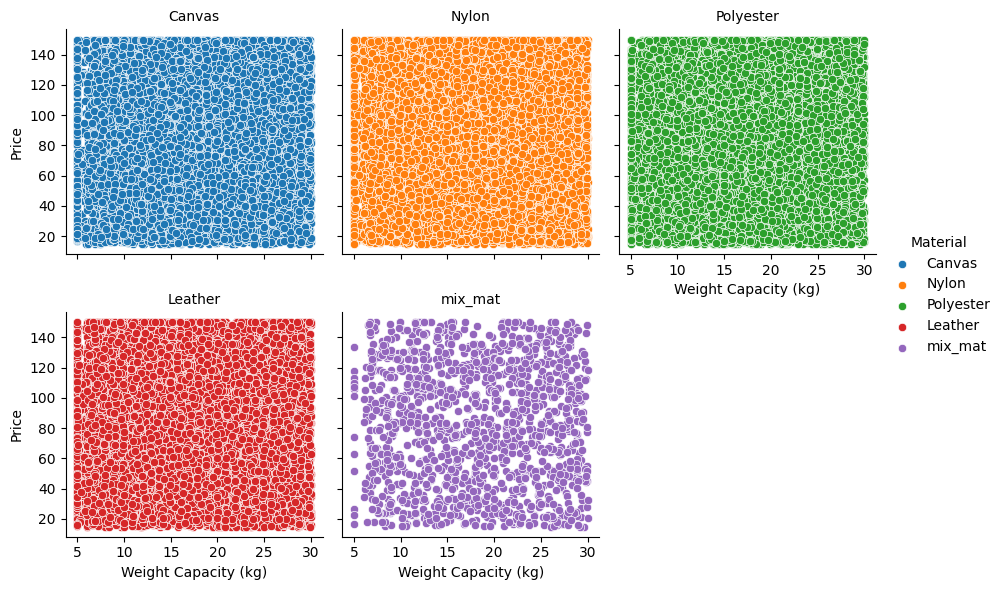

In [49]:
# FacetGrid for separate plots per Material.
g = sns.FacetGrid(Backpack_df_Blue, col='Material', hue='Material', col_wrap=3) # col_wrap controls number of plots per row
g.map(sns.scatterplot, 'Weight Capacity (kg)', 'Price')
g.add_legend()
g.set_axis_labels('Weight Capacity (kg)', 'Price')
g.set_titles(col_template="{col_name}")
# g.set(xticks=Backpack_df['Compartments'].unique())
plt.savefig('Fig/Blue_Material_Price_Weight.png')
plt.show()

### A continuum on 'Weight Capacity (kg)' makes it difficult to find relations
- divide the carrying capacity in a range of 1 kg
- divide the carrying capacity in a range of 5 kg
- divide the price into five units
- divide the price into fifteen units

In [ ]:
# makes the weight capacity in range
Backpack_df['Weight range'] = np.floor(Backpack_df['Weight Capacity (kg)']).astype(int)

In [ ]:
Backpack_df['Weight range'].value_counts().sort_index()

In [ ]:
Backpack_df['Weight range 5'] = (np.floor((Backpack_df['Weight Capacity (kg)'] - 5) / 5)).astype(int)

In [ ]:
Backpack_df['Weight range 5'].value_counts().sort_index()

In [ ]:
# makes the weight capacity in range
Backpack_df['Price Bin 5'] = (np.floor((Backpack_df['Price'] - 15) / 5)).astype(int) 

In [ ]:
Backpack_df['Price Bin 5'].value_counts().sort_index()

In [ ]:
Backpack_df['Price Bin 15'] = (np.floor((Backpack_df['Price'] - 15) / 15)).astype(int) 

In [ ]:
Backpack_df['Price Bin 15'].value_counts().sort_index()

In [ ]:
Backpack_df

In [ ]:
g = sns.FacetGrid(Backpack_df, col="Brand", col_wrap=2, height=4, aspect=1.2) # col_wrap to wrap to new row
g.map(sns.scatterplot, "Compartments", "Price Bin 5")
g.set_titles("Price Bin 5 vs. Compartments ({col_name})")
g.set_axis_labels("Compartments", "Price Bin 5")
plt.tight_layout() # Prevents overlapping titles/labels
plt.show()

In [ ]:
g = sns.FacetGrid(Backpack_df, col="Brand", col_wrap=2, height=4, aspect=1.2) # col_wrap to wrap to new row
g.map(sns.scatterplot, "Compartments", "Price")
g.set_titles("Price vs. Compartments ({col_name})")
g.set_axis_labels("Compartments", "Price")
plt.tight_layout() # Prevents overlapping titles/labels
plt.show()

In [ ]:
g = sns.FacetGrid(Backpack_df, col="Brand", col_wrap=2, height=4, aspect=1.2) # col_wrap to wrap to new row
g.map(sns.scatterplot, "Compartments", "Price Bin 15")
g.set_titles("Price Bin 15 vs. Compartments ({col_name})")
g.set_axis_labels("Compartments", "Price Bin 15")
plt.tight_layout() # Prevents overlapping titles/labels
plt.show()

In [ ]:
g = sns.FacetGrid(Backpack_df, col="Brand", hue='Material', col_wrap=2, height=4, aspect=1.2) # col_wrap to wrap to new row
g.map(sns.scatterplot, 'Weight range', "Price Bin 15")
g.set_titles("Price Bin 15 vs. 'Weight range' ({col_name})")
g.set_axis_labels('Weight range', "Price Bin 15")
plt.tight_layout() # Prevents overlapping titles/labels
plt.show()

In [ ]:
g = sns.FacetGrid(Backpack_df, col="Brand", hue='Material', col_wrap=2, height=4, aspect=1.2) # col_wrap to wrap to new row
g.map(sns.scatterplot, "Compartments", "Price Bin 15")
g.set_titles("Price Bin 15 vs. Compartments ({col_name})")
g.set_axis_labels("Compartments", "Price Bin 15")
plt.tight_layout() # Prevents overlapping titles/labels
plt.show()

In [ ]:
# Alternative: FacetGrid for separate plots per Brand.
g = sns.FacetGrid(Backpack_df, col='Brand', hue='Material', col_wrap=3) # col_wrap controls number of plots per row
g.map(sns.scatterplot, 'Compartments', 'Price')
g.add_legend()
g.set_axis_labels('Compartments', 'Price')
g.set_titles(col_template="{col_name} Brand")
g.set(xticks=Backpack_df['Compartments'].unique())
plt.show()

In [ ]:
# Alternative: FacetGrid for separate plots per Brand.
g = sns.FacetGrid(Backpack_df, col='Material', hue='Brand', col_wrap=2) # col_wrap controls number of plots per row
g.map(sns.scatterplot, 'Compartments', 'Price')
g.add_legend()
g.set_axis_labels('Compartments', 'Price')
g.set_titles(col_template="{col_name}")
g.set(xticks=Backpack_df['Compartments'].unique())
plt.show()

In [ ]:
# Alternative: FacetGrid for separate plots per Brand.
g = sns.FacetGrid(Backpack_df, col='Brand', hue='Brand', col_wrap=3) # col_wrap controls number of plots per row
g.map(sns.scatterplot, 'Compartments', 'Price')
g.add_legend()
g.set_axis_labels('Compartments', 'Price')
g.set_titles(col_template="{col_name}")
g.set(xticks=Backpack_df['Compartments'].unique())
plt.show()

In [ ]:
# Alternative: FacetGrid for separate plots per Brand.
g = sns.FacetGrid(Backpack_df, col='Brand', hue='Brand', col_wrap=3) # col_wrap controls number of plots per row
g.map(sns.scatterplot, 'Weight range 5', 'Price')
g.add_legend()
g.set_axis_labels('Weight range 5', 'Price')
g.set_titles(col_template="{col_name}")
g.set(xticks=Backpack_df['Weight range 5'].unique())
plt.show()

In [ ]:
# Alternative: FacetGrid for separate plots per Brand.
g = sns.FacetGrid(Backpack_df, col='Brand', hue='Brand', col_wrap=3) # col_wrap controls number of plots per row
g.map(sns.scatterplot, 'Weight range 5', 'Price Bin 15')
g.add_legend()
g.set_axis_labels('Weight range 5', 'Price Bin 15')
g.set_titles(col_template="{col_name}")
g.set(xticks=Backpack_df['Weight range 5'].unique())
plt.show()

In [ ]:
# Alternative: FacetGrid for separate plots per Brand.
g = sns.FacetGrid(Backpack_df, col='Brand', hue='Brand', col_wrap=3) # col_wrap controls number of plots per row
g.map(sns.scatterplot, 'Weight range 5', 'Price Bin 15')
g.add_legend()
g.set_axis_labels('Weight range 5', 'Price Bin 15')
g.set_titles(col_template="{col_name}")
g.set(xticks=Backpack_df['Weight range 5'].unique())
plt.show()

In [ ]:
g = sns.FacetGrid(Backpack_df, col='Brand', hue='Brand', col_wrap=3)
g.map(sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    errorbar="sd", palette="dark", alpha=.6, height=6
)

In [ ]:
for brand in Backpack_df['Brand'].unique():
    BP_df = Backpack_df[Backpack_df['Brand'] == brand]

    # Create separate plots for sizes
    plt.figure(figsize=(12, 4))

    # Plot for small
    plt.subplot(1, 2, 1)
    sns.histplot(data= Backpack_df[Backpack_df['Size'] == 'Small'], x='Price range', binwidth=2, hue='Material', kde=True)
    plt.title(f'Price distribution Small {brand}')

    # Plot for Medium
    plt.subplot(1, 2, 2)
    sns.histplot(data= Backpack_df[Backpack_df['Size'] == 'Medium'], x='Price range', binwidth=2, hue='Material', kde=True)
    plt.title(f'Price distribution Medium {brand}')

    # Plot for Large
    plt.subplot(2, 2, 1)
    sns.histplot(data= Backpack_df[Backpack_df['Size'] == 'Large '], x='Price range', binwidth=2, hue='Material', kde=True)
    plt.title(f'Price distribution Large {brand}')

    # Plot for non_Standar 
    plt.subplot(2, 2, 2)
    sns.histplot(data= Backpack_df[Backpack_df['Size'] == 'non_Standar'], x='Price range', binwidth=2, hue='Material', kde=True)
    plt.title(f'Price distribution non_Standar {brand}')
    
    plt.tight_layout()
   # plt.savefig(f'fig/City_{city}.png')
    plt.show()